In [12]:
from sklearn.datasets import fetch_openml

# Fetch the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)

# Access the data and target
X, y = mnist['data'], mnist['target']

# Display the shape of the data
print("Data shape:", X.shape)
print("Target shape:", y.shape)
print(type(mnist))


Data shape: (70000, 784)
Target shape: (70000,)
<class 'sklearn.utils._bunch.Bunch'>


In [15]:
import pandas as pd
X = pd.DataFrame(mnist['data'])
y = pd.Series(mnist['target'], name='target')

# Combine the features and target into a single DataFrame
mnist_df = pd.concat([X, y], axis=1)

# Display the first few rows of the DataFrame
print(mnist_df.head())

   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel10  ...  pixel776  pixel777  pixel778  pixel779  pixel780  pixel781  \
0        0  ...         0         0         0         0         0         0   
1        0  ...         0         0         0         0         0         0   
2        0  ...         0         0         0         0         0         0   
3        0  ...         0         0         0         0         0         0   
4        0  ...         0         0         0         0         0         0   

   pixel782  pixel783  pixel784  target  
0         0         

In [22]:
print(X.values[0].reshape(28, 28))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

10


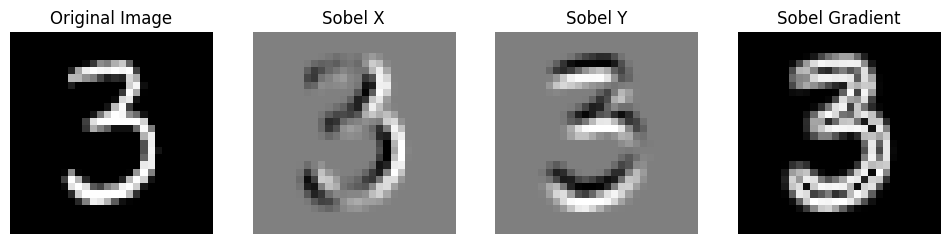

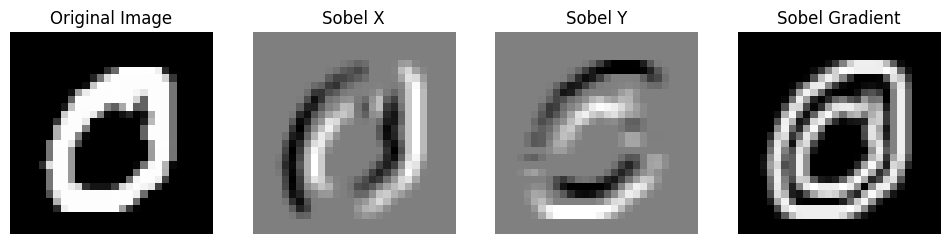

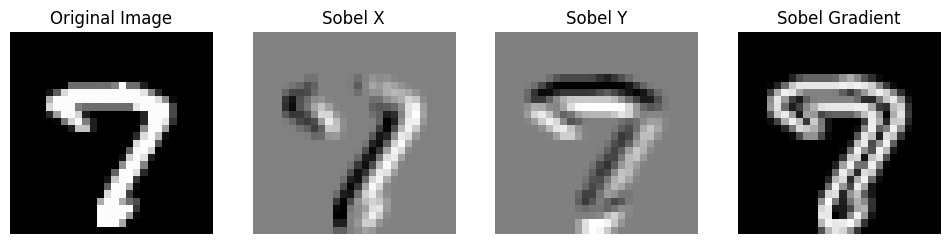

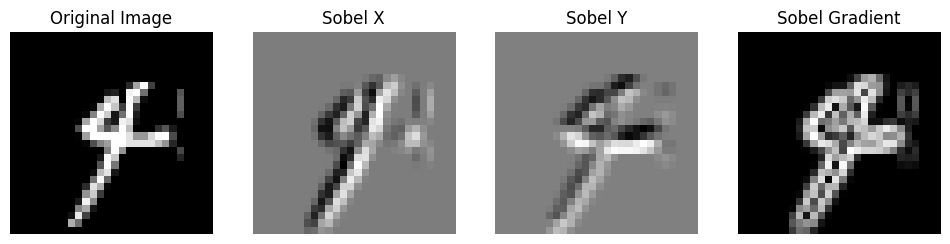

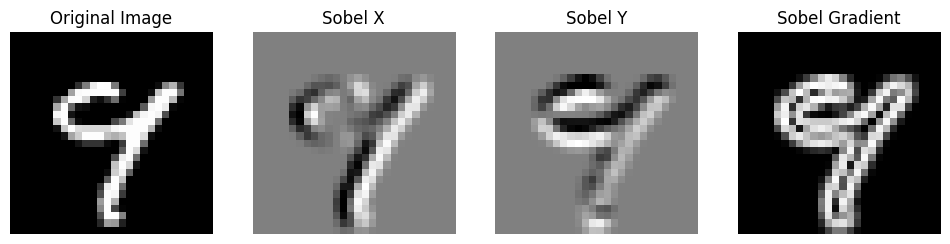

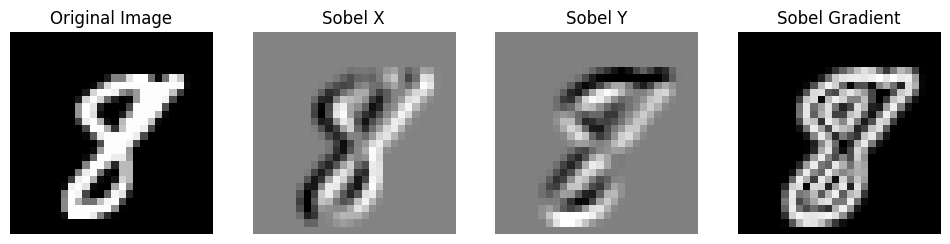

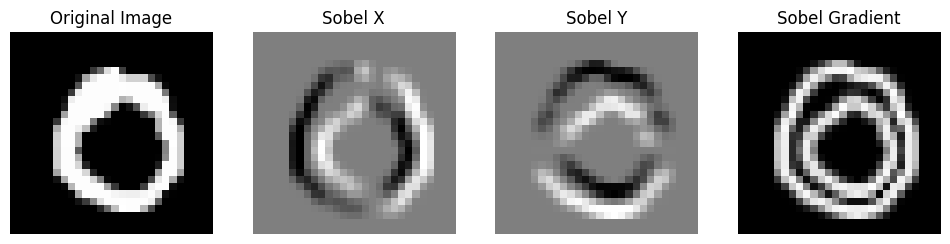

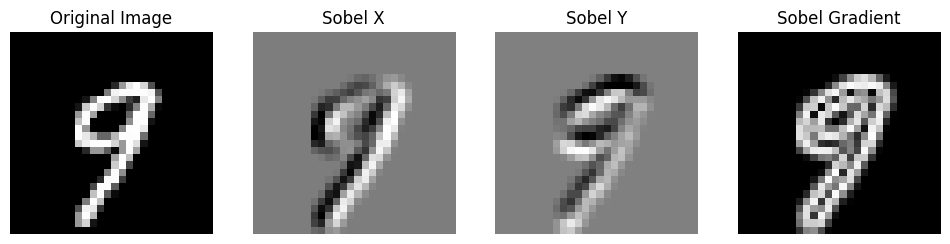

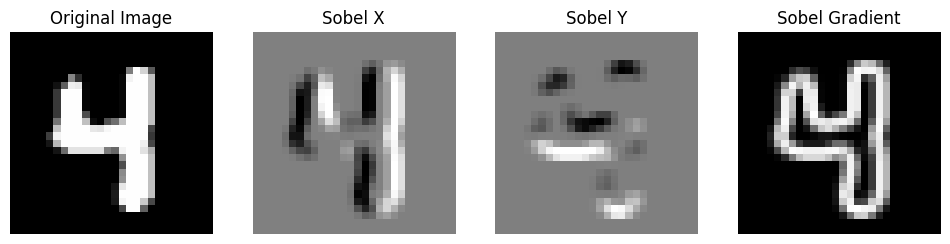

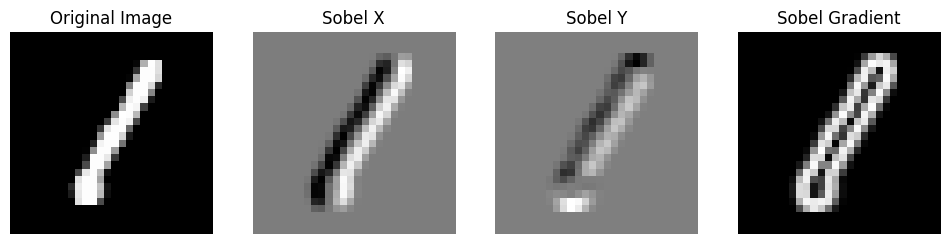

10


In [64]:
import numpy as np
import matplotlib.pyplot as plt

def convolve2d(image, kernel):
    # Get the dimensions of the kernel
    kernel_height, kernel_width = kernel.shape
    # Calculate the padding size
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    
    # Pad the image to handle borders
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)
    
    # Get the dimensions of the padded image
    padded_height, padded_width = padded_image.shape
    
    # Create an output array
    output = np.zeros_like(image, dtype=np.float64)
    
    # Perform convolution
    for i in range(pad_height, padded_height - pad_height):
        for j in range(pad_width, padded_width - pad_width):
            # Extract the region of interest
            region = padded_image[i - pad_height:i + pad_height + 1, j - pad_width:j + pad_width + 1]
            # Apply the kernel
            output[i - pad_height, j - pad_width] = np.sum(region * kernel)
    
    return output

def apply_sobel_filters(image):
    # Sobel kernels
    sobel_x = np.array([[1, 0, -1],
                         [2, 0, -2],
                         [1, 0, -1]])

    sobel_y = np.array([[1, 2, 1],
                         [0, 0, 0],
                         [-1, -2, -1]])

    # Apply Sobel filters
    gradient_x = convolve2d(image, sobel_x)
    gradient_y = convolve2d(image, sobel_y)

    return gradient_x, gradient_y

images = []
for i in range(10):
    image = X.values[i+50].reshape(28, 28)
    images.append(image)

print(len(images))

# Load the image
for i in range(10):
    image = images[i]

# Apply Sobel filters
    gradient_x, gradient_y = apply_sobel_filters(image)
    
    G = np.sqrt(gradient_x**2 + gradient_y**2)
    
    # Display results
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 4, 1)
    plt.title('Original Image')
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
    plt.subplot(1, 4, 2)
    plt.title('Sobel X')
    plt.imshow(gradient_x, cmap='gray')
    plt.axis('off')
    
    plt.subplot(1, 4, 3)
    plt.title('Sobel Y')
    plt.imshow(gradient_y, cmap='gray')
    plt.axis('off')
    
    
    plt.subplot(1, 4, 4)
    plt.title('Sobel Gradient')
    plt.imshow(G, cmap='gray')
    plt.axis('off')
    
    plt.show()


print(len(images))

In [44]:
print(len(images))

10


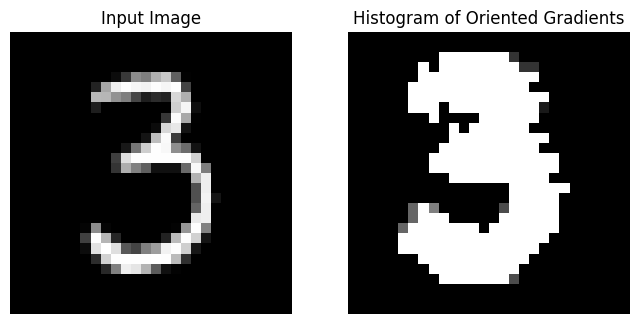

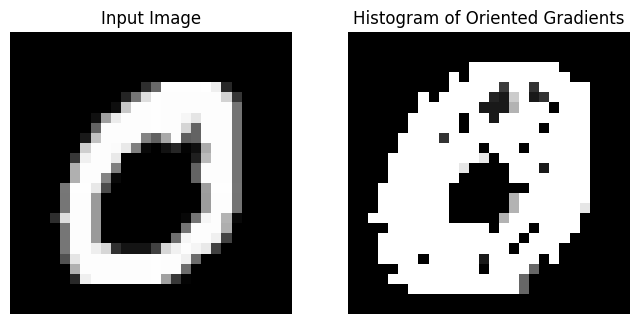

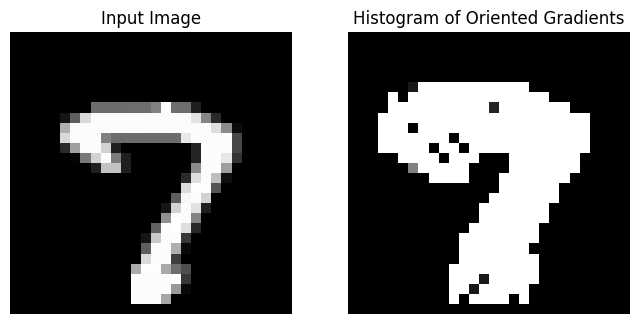

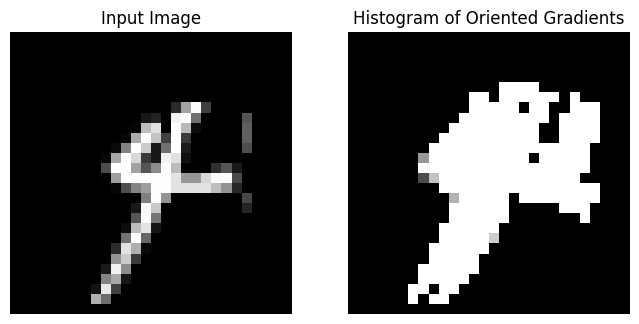

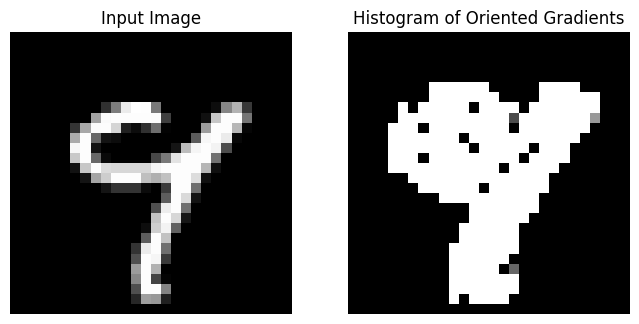

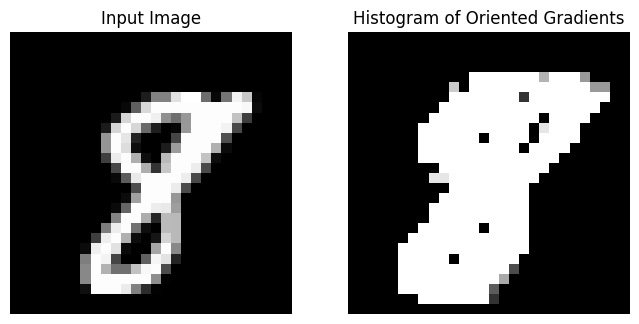

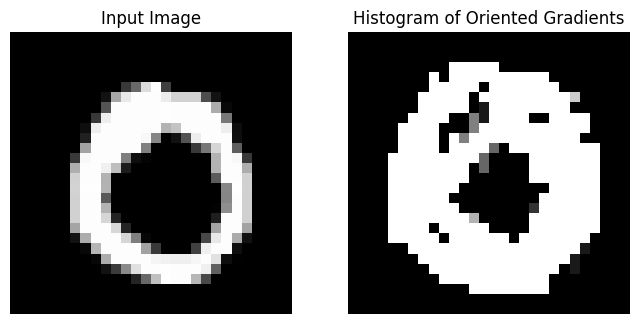

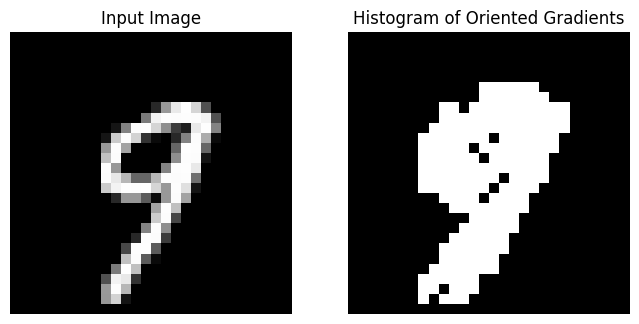

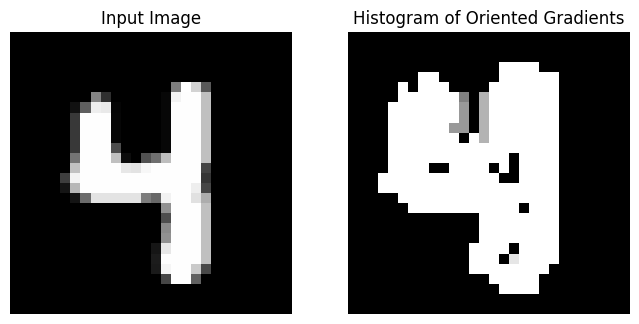

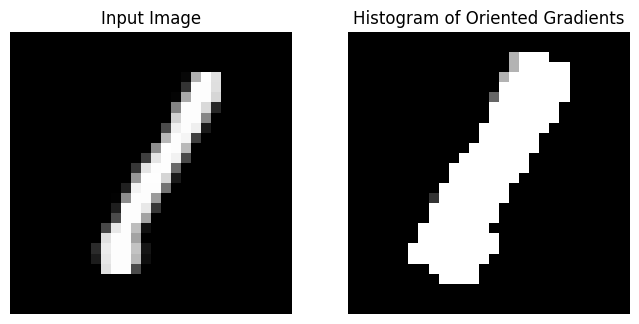

In [48]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure

# Assuming 'image' is your 28x28 2D NumPy array
# Example: image = np.random.rand(28, 28) * 255  # Replace with your actual image

# Compute HOG features and visualize

for i in range(10):
    image = images[i]

    fd, hog_image = hog(
        image,
        orientations=8,
        pixels_per_cell=(1, 1),  # Adjusted for a 28x28 image
        cells_per_block=(1, 1),
        visualize=True
    )
    
    # Create subplots to display the original image and HOG image
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
    
    ax1.axis('off')
    ax1.imshow(image, cmap=plt.cm.gray)
    ax1.set_title('Input Image')
    
    # Rescale histogram for better display
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
    
    ax2.axis('off')
    ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
    ax2.set_title('Histogram of Oriented Gradients')
    
    plt.show()


<class 'pandas.core.frame.DataFrame'>
   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0        0  ...         0         0         0         0         0         0   
1        0  ...         0         0         0         0         0         0   
2        0  ...         0         0         0         0         0         0   
3        0  ...         0         0         0         0         0         0   
4        0  ...         0         0         0         0         0         0   

   pixel781  pixel782  p

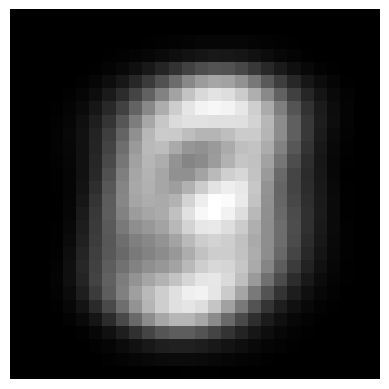

In [65]:
print(type(X))
image = X.mean()
plt.imshow(image.values.reshape(28, 28), cmap='gray')
plt.axis('off')
#plt.imshow(X.values[0].reshape(28, 28), cmap='gray')
print(X.head())

In [66]:
X_minus_mean = X - X.mean()

(-0.5, 27.5, 27.5, -0.5)

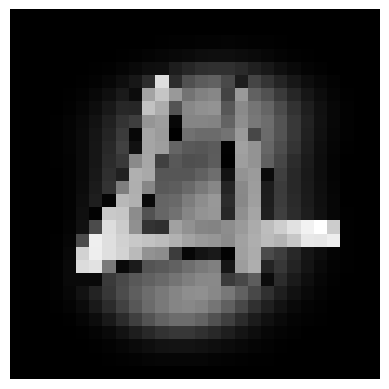

In [80]:
plt.imshow(abs(-X_minus_mean.values[1220].reshape(28, 28)), cmap='gray')
plt.axis('off')

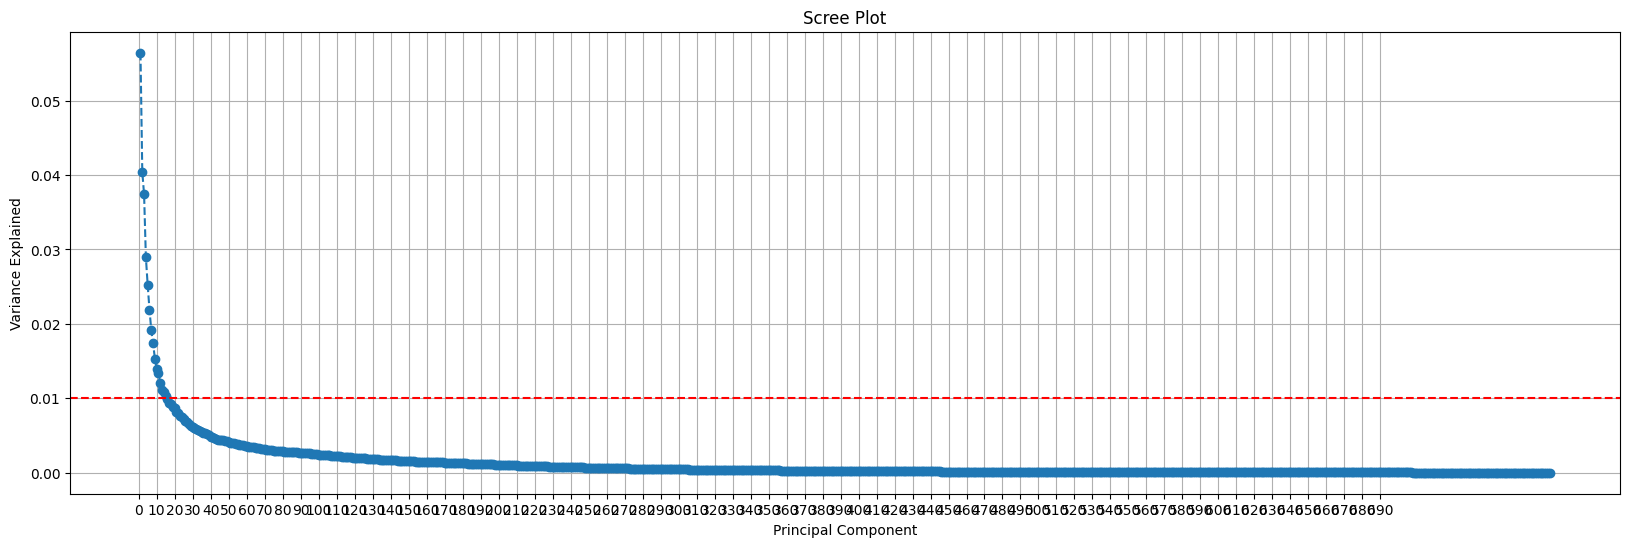

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 2: Standardize the data
X_standardized = StandardScaler().fit_transform(X)

# Step 3: Apply PCA
pca = PCA()
pca.fit(X_standardized)

# Step 4: Create a Scree Plot
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(20, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.xticks(np.arange(0, 700, step=10))  # Adjust x-ticks for better visibility
plt.grid()
plt.axhline(y=0.01, color='r', linestyle='--')  # Optional: horizontal line for threshold
plt.show()


In [88]:
X_reduced = (PCA(n_components=15)).fit_transform(X_standardized)
print(X_reduced.shape)

(70000, 15)
